In [1]:
import time
import matplotlib.pyplot as plt

# Environments
from environments.ACOEnvironment import ACOEnvironment
from environments.Environment import Environment

# Algorithms
from algorithms.AntColonyOptimization import AntColonyOptimization
from algorithms.ParticleSwarmOptimization import ParticleSwarmOptimization

# Helper classes
from helpers.PathSpecification import PathSpecification
from helpers.Coordinate import Coordinate

# Ant Colony Optimization

First, we initialize the variables we will be using for the example.

In [13]:
# Please keep your parameters for the environment easily changeable here
width = 40
height = 40
start_pos = Coordinate(0, 16)
end_pos = Coordinate(39, 39)
step_size = 1
amount_of_obstacles = 0.4
radius_obstacles = 2

In [14]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 100
generations = 1000
mutation_prob = 0.005
crossover_prob = 0.7
persist_file = "./../data/optimal_tsp"

In [15]:
# Please keep your parameters for the ACO easily changeable here
agents_per_generation = 30
no_generations = 50
q = 500
evaporation = 0.5
trail = 1.0
convergence_iter = 3500
no_change_iter = 30
sigma_elite = 50

Next, we build the environment and other necessary objects. We also print how the environment looks like

Finished preparing the environment
Finished preparing the environment


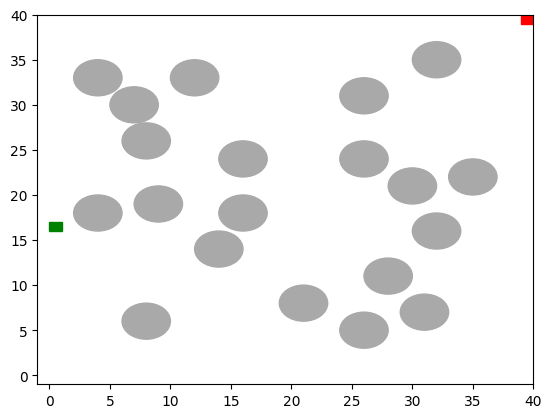

In [16]:
# Construct the optimization objects
environment = ACOEnvironment.create_environment(width, height, radius_obstacles, amount_of_obstacles, start_pos=start_pos, end_pos=end_pos)
pso_environment = Environment.create_environment(width, height, radius_obstacles, amount_of_obstacles, start_pos=start_pos, end_pos=end_pos)
spec = PathSpecification(start_pos, end_pos)
aco = AntColonyOptimization(environment, agents_per_generation, no_generations, q, evaporation, convergence_iter, no_change_iter, trail, sigma_elite, step_size, num_processes=6)

# for now 10 particles and inertia weight of 1
pso = ParticleSwarmOptimization(pso_environment, spec, 100, convergence_iter, trail, step_size, 1)

# Show the environment in matplotlib
pso_environment.visualize_environment()

Next, we run the ACO algorithm and print the results.

Started PSO
0, 16
1, 17
2, 17
2, 19
3, 20
4, 21
5, 22
6, 23
7, 24
7, 24
7, 24
8, 23
9, 22
10, 21
11, 20
12, 19
13, 18
14, 17
15, 16
15, 16
15, 16
15, 16
15, 16
15, 16
15, 16
15, 16
15, 16
15, 16
15, 16
15, 16
14, 19
15, 20
16, 21
17, 22
18, 23
19, 24
20, 25
21, 26
22, 27
23, 28
24, 29
24, 29
24, 29
24, 29
24, 29
24, 29
24, 29
24, 29
24, 29
24, 29
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
24, 30
25, 29
25, 29
26, 28
27, 27
27, 27
27, 27
27, 27
27, 28
28, 29
29, 30
30, 31
31, 32
31, 33
33, 32
34, 33
35, 34
36, 35
37, 36
38, 37
39, 38
39, 39
Time taken: 0.451
Route size: 88


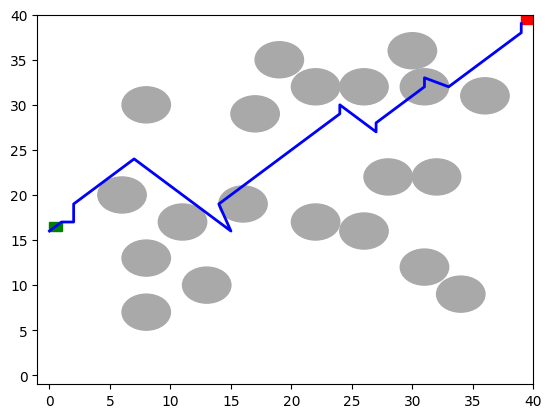

In [17]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started PSO")

# Run optimization
# shortest_route, checkpoints = aco.find_shortest_route(spec, print_progress=True)
# run the pso
shortest_route = pso.run()

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

# Print route path
environment.visualize_environment(shortest_route)

#### Parameter tuning

Now, we will start tuning several hyperparameters for our ACO Algorithm. Specifically, we will be tuning the q value.

In [ ]:
agents_per_generation = 15
no_generations = 20
evaporation = 0.1
trail = 1.0
convergence_iter = 100
no_change_iter = 20
sigma_elite = 5

environment = ACOEnvironment.create_environment(width, height, start_pos, end_pos, radius_obstacles, amount_of_obstacles)
spec = PathSpecification.read_coordinates(start_pos, end_pos)
distances = []
q_list = [1, 10, 100, 500, 1000]

for q in q_list:
    shortest_route = 0
    aco = AntColonyOptimization(environment, agents_per_generation, no_generations, q, evaporation, convergence_iter, no_change_iter, trail, sigma_elite, num_processes=6)
    for i in range(10):
        route, checkpoints = aco.find_shortest_route(spec)
        shortest_route += route.size()
    distances.append(shortest_route / 10)

plt.plot(q_list, distances)
plt.xlabel("Q values")
plt.ylabel("Route size")
plt.title("Q value versus route size")
plt.show()

#### Speed of convergence (generations) of the grading environments

In [ ]:
agents_per_generation = 20
no_generations = 50
q = 200
evaporation = 0.2
trail = 1.0
convergence_iter = 10000
no_change_iter = 50
sigma_elite = 50

environment = ACOEnvironment.create_environment(width, height, start_pos, end_pos, radius_obstacles, amount_of_obstacles)
spec = PathSpecification.read_coordinates(start_pos, end_pos)
aco = AntColonyOptimization(environment, agents_per_generation, no_generations, q, evaporation, convergence_iter, no_change_iter, trail, sigma_elite, num_processes=6)
shortest_route, checkpoints = aco.find_shortest_route(spec)



plt.plot([1, 3, 5, 7, 10, 20, 30, 40, 50], checkpoints)
plt.xlabel("Generations")
plt.ylabel("Route size")
plt.title("Speed of convergence for medium environment")
plt.show()